In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.optim import SGD 
import matplotlib.pyplot as plt 
import seaborn as sns 

We create a new variable called `w00`, and make it a neural network parameter. Making this weight a parameter for the nn gives us the option to optimize it. We initialize with a tensor set to 1.7.

Note: Since this is a tensor, the nn can take the advantage of the accelerated aritemetic and automatic differentiation that it provides.

Lastly because we dont need to optimize the weight we set requires_grad to False. 


In [53]:
class BasicNN(nn.Module): 
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(-16., requires_grad=False))
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00 
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01 
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11 
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias 
        
        output = F.relu(input_to_final_relu)
        return output
    

`forward()` does the forward pass through the neural network by taking an input value and calculating the output value with the weights, biases and the activation function. 

Here, we use pytorch function linspace to create a tensor with a sequence of 11 values between, and including 0 and 1. The idea is to run these input values though our neural network 

In [54]:
input_doses = torch.linspace( start=0, end=1, steps=11 )
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [55]:
model = BasicNN()
output_values = model(input_doses)

Now, as we have input values as well as output values, we can use them to draw a graph, that has different drug doses on the x-axis and the predicted effectiveness in the y-axis. 

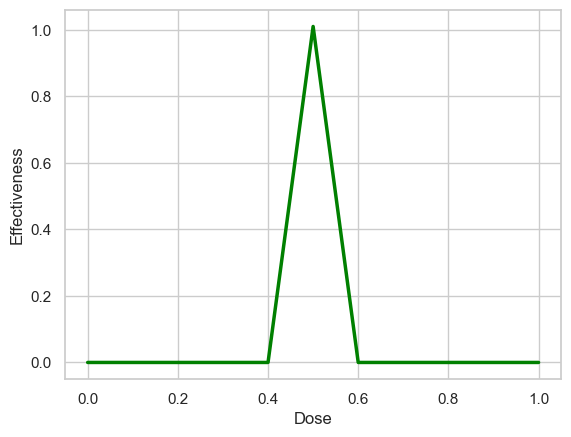

In [56]:
# Convert tensors to numpy arrays for plotting
sns.set(style="whitegrid")
sns.lineplot(x=input_doses.detach().numpy(), 
             y=output_values.detach().numpy(),
             color="green",
             linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')
plt.show()

# BASIC NN TRAIN

In [57]:
class BasicNN_train(nn.Module): 
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        self.final_bias = nn.Parameter(torch.tensor(0., requires_grad=True))
    
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00 
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01 
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11 
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias 
        
        output = F.relu(input_to_final_relu)
        return output
    

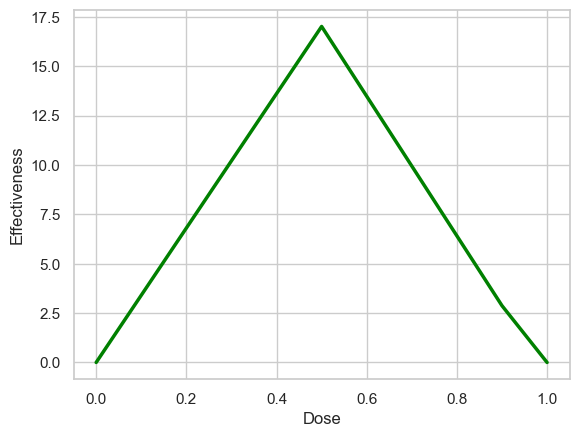

In [58]:
model = BasicNN_train()
output_values = model(input_doses)

# Convert tensors to numpy arrays for plotting
sns.set(style="whitegrid")
sns.lineplot(x=input_doses.detach().numpy(), 
             y=output_values.detach().numpy(),
             color="green",
             linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')
plt.show()

In [59]:
inputs = torch.tensor([0. , 0.5, 1.])
labels = torch.tensor([0., 1, 0.])

Now we need to optimize the last bias bfinal 

In [60]:
optimizer = SGD(model.parameters(), lr=0.1 )
print("Final Bias, before optimization: " + str(model.final_bias.data) + "\n")

for epoch in range(100):
    total_loss =0 
    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]
        
        output_i = model(input_i)
        loss = (output_i - label_i)**2
        loss.backward()
        total_loss += float(loss)
    
    if(total_loss < 0.0001):
        print("Num Steps :" + str(epoch))
        break
    
    optimizer.step()
    optimizer.zero_grad()
    
    print("Step: " + str(epoch) + " Final Bias" + str(model.final_bias.data) + "\n")
print("Final bias after optimization " + str(model.final_bias.data))

Final Bias, before optimization: tensor(0.)

Step: 0 Final Biastensor(-3.2020)

Step: 1 Final Biastensor(-5.7636)

Step: 2 Final Biastensor(-7.8129)

Step: 3 Final Biastensor(-9.4523)

Step: 4 Final Biastensor(-10.7638)

Step: 5 Final Biastensor(-11.8131)

Step: 6 Final Biastensor(-12.6525)

Step: 7 Final Biastensor(-13.3240)

Step: 8 Final Biastensor(-13.8612)

Step: 9 Final Biastensor(-14.2909)

Step: 10 Final Biastensor(-14.6348)

Step: 11 Final Biastensor(-14.9098)

Step: 12 Final Biastensor(-15.1298)

Step: 13 Final Biastensor(-15.3059)

Step: 14 Final Biastensor(-15.4467)

Step: 15 Final Biastensor(-15.5594)

Step: 16 Final Biastensor(-15.6495)

Step: 17 Final Biastensor(-15.7216)

Step: 18 Final Biastensor(-15.7793)

Step: 19 Final Biastensor(-15.8254)

Step: 20 Final Biastensor(-15.8623)

Step: 21 Final Biastensor(-15.8919)

Step: 22 Final Biastensor(-15.9155)

Step: 23 Final Biastensor(-15.9344)

Step: 24 Final Biastensor(-15.9495)

Step: 25 Final Biastensor(-15.9616)

Step: 2

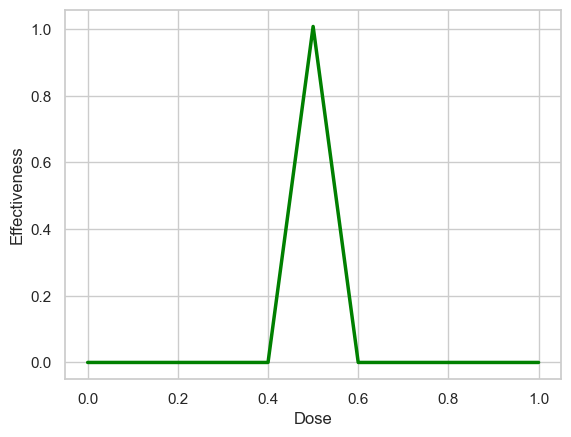

In [62]:
output_values = model(input_doses)

sns.set(style="whitegrid")
sns.lineplot(x=input_doses, 
             y=output_values.detach(),
             color="green",
             linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')
plt.show()